### Wine Quality Estimator
<span style="font-family:Papyrus; font-size:2em;">
Wine making is a nice hobby. Anybody can learn and make thier own wine at home. Given measurements(alchohol level, sugar level etc) of a wine we can predict the quality of the wine. Quality of the wine is represented as 0 to 10. 0 means low qualty, 10 means high quality.
Given a data set consisting of different wines and measurements and their quality score, we can train a regression model and perdict the quality of unseen wine.

We are going to use wine quality database here: https://archive.ics.uci.edu/dataset/186/wine+quality
</span>

# Import useful libraries

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

<span style="font-family:Papyrus; font-size:2em;">
In the following cell:
    
* We read from the dataset.
* As seen from the output, each data point have 10 features and the wine quality.
* Using the head() function we verify the data is read properly
</span>

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=';')
print(df.info())
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Explore data with linear regression
<span style="font-family:Papyrus; font-size:2em;">
Since all columns are numerical, we can see how much each of the features are correlated to the quality. Correlation is weak, the alchohol level is the top predictor and correlation is only 0.22. This suggests the linear model will not be as good.
</span>

In [3]:
# your code here
rsquared_list = []
for column in df.columns:
    if column == 'quality':
        continue
    model = smf.ols(formula='quality ~ Q("' + column + '")', data=df).fit()
    rsquared_list.append((model.rsquared, column))
rsquared_list.sort(reverse=True)
print(rsquared_list)

[(0.2267343681127545, 'alcohol'), (0.15253537972474884, 'volatile acidity'), (0.06320049136455641, 'sulphates'), (0.05124451523867224, 'citric acid'), (0.03426211696068793, 'total sulfur dioxide'), (0.030596736248323264, 'density'), (0.0166169011930003, 'chlorides'), (0.015388811647710554, 'fixed acidity'), (0.0033329135305093516, 'pH'), (0.00256603613553541, 'free sulfur dioxide'), (0.00018855786403859653, 'residual sugar')]


## Plotted the top 3 features as a sanity check
<span style="font-family:Papyrus; font-size:2em;">
Looking at the plots they don't show correlation
</span>

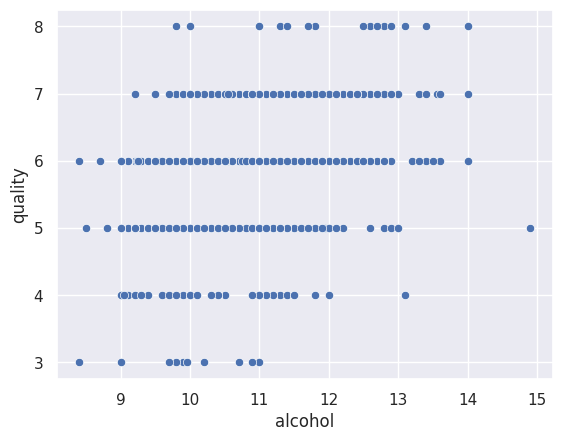

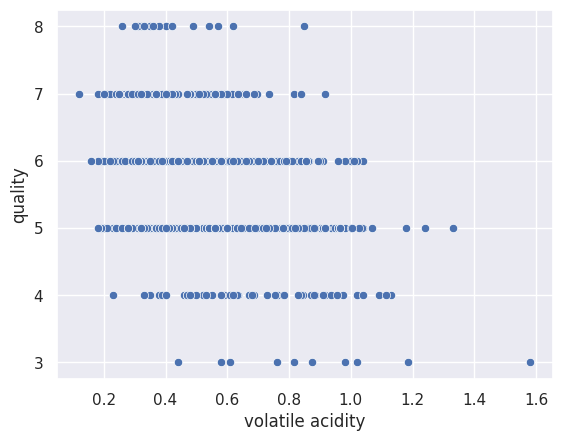

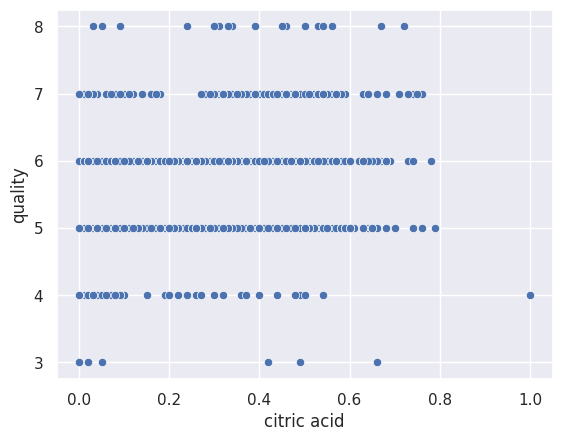

In [4]:
sns.scatterplot(x='alcohol', y='quality',data=df)
plt.show()
sns.scatterplot(x='volatile acidity', y='quality',data=df)
plt.show()
sns.scatterplot(x='citric acid', y='quality',data=df)
plt.show()

# Fitted linear regression using the top 3 features
<span style="font-family:Papyrus; font-size:2em;">
With this R squared value of 0.33 is achieved. 
</span>

In [5]:
model = smf.ols(formula='quality ~ Q("alcohol") +  Q("volatile acidity") + sulphates', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          3.16e-141
Time:                        11:44:48   Log-Likelihood:                -1599.4
No. Observations:                1599   AIC:                             3207.
Df Residuals:                    1595   BIC:                             3228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.61

# Data Cleaning and Fitting Again
<span style="font-family:Papyrus; font-size:2em;">
Plotted the leverage vs residual graph and removed some outliers with high leverage.
Then fitted the same model again to achieve R squared value of 0.35
</span>

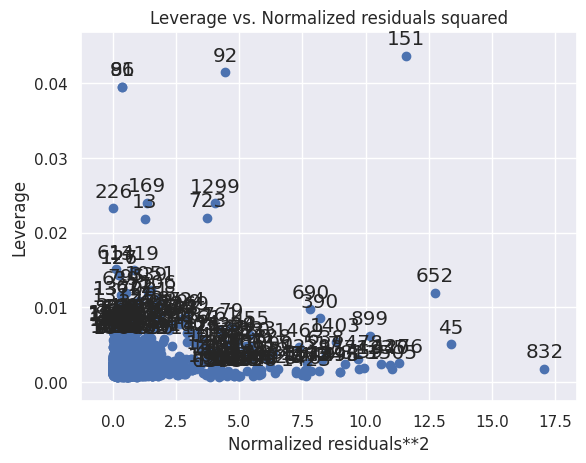

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     289.1
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.38e-149
Time:                        11:44:48   Log-Likelihood:                -1553.2
No. Observations:                1585   AIC:                             3114.
Df Residuals:                    1581   BIC:                             3136.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.36

In [6]:
sm.graphics.plot_leverage_resid2(model, label='quality')
plt.show()

newdf = df.drop([86, 91, 92,151, 832, 652, 45, 226, 169, 13, 723, 1299, 614, 1319], axis=0)

model = smf.ols(formula='quality ~ Q("alcohol") +  Q("volatile acidity") + sulphates', data=newdf).fit()
print(model.summary())

# Feature engineering and restating our goal
<span style="font-family:Papyrus; font-size:2em;">
As we can see, doing regression is probably not going to be super effective. So I decided to transform the problem into classification problem. I achieved this by making the problem into detection of high quality wine.
</span>

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


In [8]:
X, y = df.drop('quality', axis=1).values, df['quality'].values

# Data update plus test train split 
<span style="font-family:Papyrus; font-size:2em;">
We update the data so that we consider a wine of quality 5 or above as high quality
We split the data test train so that we can compare accuracy of different models.
</span>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train_classification = y_train >= 5
y_test_classfication = y_test >= 5


# Hyperparameter tuning of KNN
<span style="font-family:Papyrus; font-size:2em;">

We consider all different ks from 2 to 256. We train knn on training data then compute the accuracy with test data.
Best test accuracy we obain with KNN is 0.96 which is pretty impressive

</span>

In [26]:
for i in range(1, 9):
    k = 2 ** i
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    knn.fit(X_train_scaled, y_train_classification)
    
    # Predict on the test data
    y_pred_knn =  knn.predict(X_test_scaled)
    
    acc_knn = accuracy_score(y_test_classfication, y_pred_knn)
    print(f"k: {k} test accuracy: {acc_knn:.2f}")



k: 2 acc: 0.91
k: 4 acc: 0.93
k: 8 acc: 0.95
k: 16 acc: 0.96
k: 32 acc: 0.96
k: 64 acc: 0.96
k: 128 acc: 0.96
k: 256 acc: 0.96


# Hyper parameter tuning of Random Forest
<span style="font-family:Papyrus; font-size:2em;">

We tune the max_depth and min_samples_leaf parameters of random forest using grid search. Then we plot the result in grid. Then we pick the best one and compute the test accuracy.

</span>

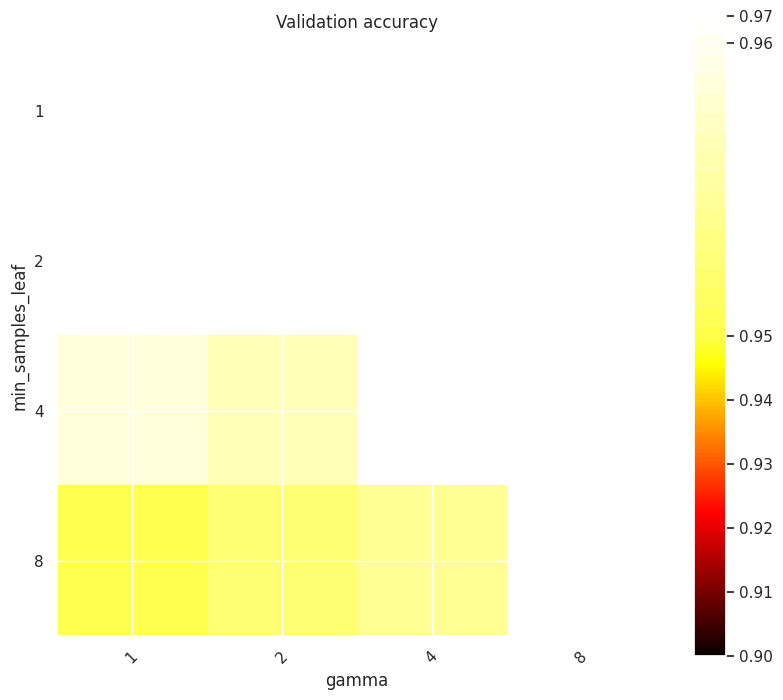

In [30]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    

def plotSearchGrid(grid):
    
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["max_depth"]), len(grid.param_grid["min_samples_leaf"]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.9, midpoint=0.95))
    plt.xlabel('gamma')
    plt.ylabel('min_samples_leaf')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["min_samples_leaf"])), grid.param_grid["min_samples_leaf"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["max_depth"])), grid.param_grid["max_depth"])
    plt.title('Validation accuracy')
    plt.show()

grid=None # ToDo: replace it to proper GridSearchCV object and run the grid search with cross validation

# your code here
paramGrid = {
    'max_depth': [ 2 ** i  for i in range(0, 4)],
    'min_samples_leaf': [2 ** i  for i in range(0, 4)],
    'n_estimators': [400],
}

# Initialize the model
rf = RandomForestClassifier()

# Setup GridSearchCV
grid = GridSearchCV(rf, paramGrid, scoring='accuracy')

# Fit GridSearchCV
grid.fit(X_train, y_train_classification)

plotSearchGrid(grid)

# We achieve high training accuracy

In [31]:
print(f"training accuracy: {grid.best_score_}, best params: {grid.best_params_}")

training accuracy: 0.9609129901960785, best params: {'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 400}


# We achieve high test accuracy matching KNN

In [32]:
y_pred_svm = grid.best_estimator_.predict(X_test)
acc = accuracy_score(y_test_classfication, y_pred_svm)
print(f"test accuracy: {acc:.2f}")

test accuracy: 0.96


# Result


<span style="font-family:Papyrus; font-size:2em;">
Using hyper parameter tuning techniques, we achieved 96 percent accuracy of predicting if a wine is high quality or not using both KNN and Random forest classifiers. 

Learning point would be that when regression problem is too hard, we can settle for classification. In this case classification is slightly easier because we are not trying to predict from 0 to 10 exact. Predicting if above 5 or below 5 is easier than predicting the exact quality.

</span>
